## Redução de alta dimensionalidade - PCA

Como você analisa as variáveis de seu dataframe?

Utilizamos a análise de correlações para identificar qual são as variáveis que possuem maior correlação entre si e retiramos de nossa base de dados as variáveis que não são correlacionadas. Porém, se obtermos somente variáveis altamente correlacionadas em nosso modelo, nosso resultado de algoritmo pode ser **enviesado**.

Como podemos obter as melhores variáveis do dataset, sem perder ou enviesar dados?

A análise de componentes principais ou PCA, é um método de machine learning que descobre **conjuntos de variáveis correlacionadas** e as reduz para um conjunto de **variáveis não correlacionadas** que representam as variáveis originais e são chamadas de **componentes principais**. 

Podemos concluir então que se removermos as redundâncias, os ruídos, os outliers e reduzimos as dimensões das nossas variáveis, o que sobra são as partes mais importantes do nosso conjunto de dados original. 

Sendo assim, o PCA pode ser utilizado para: 

- Detecção de fraude e de spam;
- **Reconhecimento de imagem**;
- Reconhecimento de fala;
- Remoção de outlier;
- Pré-processar os seus dados.

**PCA = Obtenção de variáveis mais importantes de nosso dataset**

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from keras.models import Sequential, Model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

### Criando o dataframe

In [2]:
#Carregar a matriz X e y do conjunto de dados

X,y = make_classification(n_samples=3000, n_features=17, n_informative=7, 
                    n_redundant=3, n_repeated=0, n_classes=4, n_clusters_per_class=1,
                          class_sep=1,
                   flip_y=0.1,weights=[0.125,0.125,0.125,0.125], random_state=17)

In [3]:
X.shape

(3000, 17)

In [4]:
y.shape

(3000,)

### Passando o array para dataframe:

In [5]:
dataframe = pd.DataFrame(X)
dataframe.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.304543,-2.874958,-0.960025,-2.335551,-0.173567,0.312733,6.079758,-0.684301,-2.101684,-3.712712,-0.340523,-0.585395,-0.715529,2.669273,2.306174,-0.908160,1.272466
1,-0.370734,-0.609097,-1.768233,0.067507,0.379967,0.559861,1.311035,-0.602244,-0.199366,1.233568,2.361571,-1.156181,0.340764,0.023813,-0.064113,-0.999570,1.425103
2,0.466728,-1.970859,0.601193,-0.281025,-0.940215,0.020031,-2.276388,1.431936,0.392376,1.264772,-2.322407,-1.216699,-0.959345,0.599887,0.695262,0.625211,-3.938132


### Fazendo correlações

<AxesSubplot:>

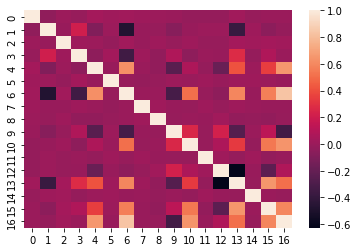

In [6]:
sb.heatmap(dataframe.corr())  

Imagina o trabalho que teríamos de relizar essa análise de correlação com 17 variáveis? 

Podemos encontrar aqui alguns contra nessa situação...dimensões muito grandes (muitas variáveis no modelo) podem **dificultar o treinamento de nosso algoritmo**, exigir **alto custo computacional** e caso retirarmos as variéveis não correlacionadas, podmeos **perder informação dos dados** (mesmo que não muito relevantes) e assim manter aepnas dimensões altamente correlacionadas(overfiting).

## Aplicando o PCA:

O PCA pode nos ajudar nesse problema de identificação de variáveis de nosso modelo. O PCA irá extrair o **melhor de nossas variáveis contidas no modelo** e armazenar esses dados em **componentes principais**. Cada componente principal, é uma junção de combinação linear entre as variáveis de nosso dataset, agrupadas por variância.

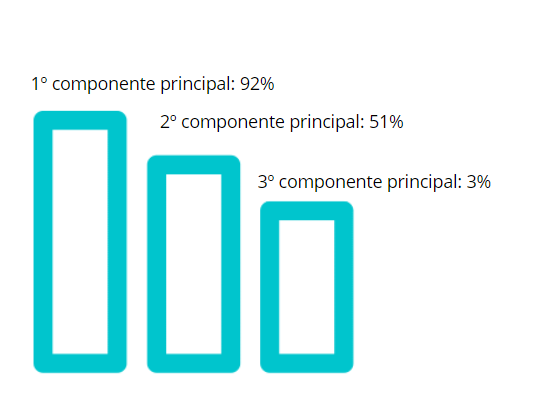

In [7]:
from IPython.display import Image #Para visualizar imagens explicativas
Image(filename='PCA.png') 

**Considerações:**

- Utilizado para superar a redundância de conjunto de dados.
- Os componentes principais não são correlacionados.
- O primeiro componente possui maior variância nos dados (juntar as melhores variáveis).
- Auxilia a explicar os dados de forma geral.
- Para a aplicação dessa técnica, os dados devem estar padronizados e numéricos (mesma escala)

### Aplicando a técnica de PCA no nosso dataset

In [8]:
pca = PCA(n_components=3) #utilizando 3 componentes
principalComponents = pca.fit_transform(X)
dfpca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
dfpca['target'] = y

In [9]:
print(pca.explained_variance_ratio_) # nos mostra o percentual de variabilildade dos dados agrupados
print(pca.singular_values_)

[0.51208319 0.15251737 0.07852075]
[318.86510477 174.01888762 124.86161495]


### Observe como agora a análise de correlação aos dados se torna muito melhor!

<AxesSubplot:>

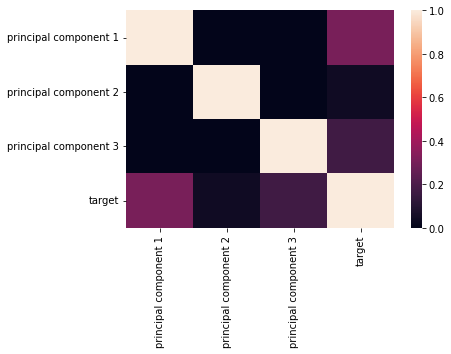

In [10]:
sb.heatmap(dfpca.corr())

### Plotando o gráfico para melhor compreensão de nosso resultado com PCA

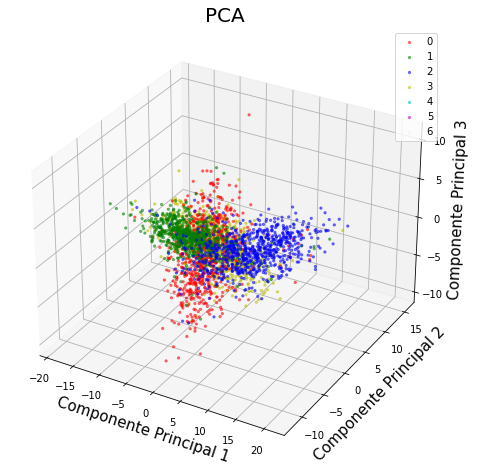

In [11]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d') 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_zlabel('Componente Principal 3', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

targets = [0, 1, 2, 3, 4, 5, 6]
colors = ['r', 'g', 'b', 'y' , 'c', 'm', '#eeefff']
alphas = [0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for target, color in zip(targets,colors):
    indicesToKeep = dfpca['target'] == target
    ax.scatter3D(dfpca.loc[indicesToKeep, 'principal component 1']
               , dfpca.loc[indicesToKeep, 'principal component 2']
               , dfpca.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 5
               , alpha  = 0.5)
ax.legend(targets)
ax.grid()


### Aplicando o PCA - exemplo 2

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

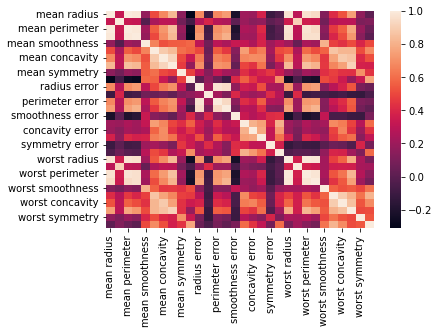

In [15]:
sb.heatmap(df.corr())  

In [16]:
len(df)

569

### Normalizando os dados:

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [18]:
scaled_data = scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Aplicando o PCA:

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [20]:
x_pca = pca.transform(scaled_data)

In [21]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

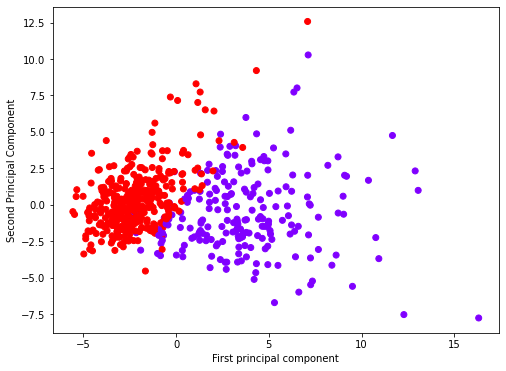

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [23]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<AxesSubplot:>

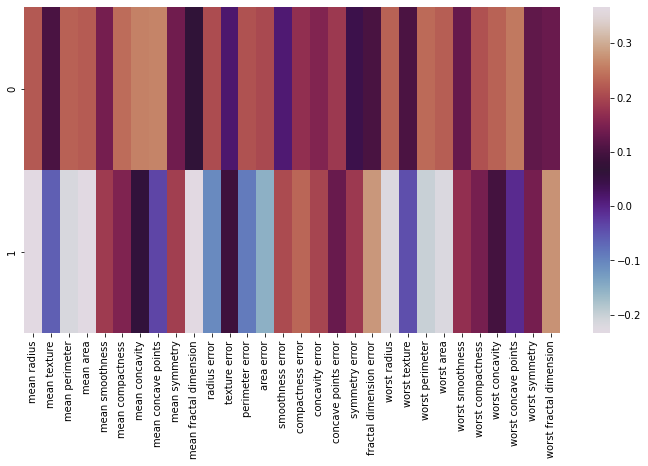

In [24]:
import seaborn as sns

map= pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

In [25]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [26]:
Resultados_PCA= pd.DataFrame(pca.components_,columns=cancer['feature_names'])
Resultados_PCA.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [ ]:
df.columns